In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
nyc_taxi_df = pd.read_csv('data-files/nyc_taxi.csv')

In [4]:
nyc_taxi_df.info()
nyc_taxi_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10320 entries, 0 to 10319
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   timestamp  10320 non-null  object
 1   value      10320 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 161.4+ KB


,timestamp,value
0,2014-07-01 00:00:00,10844
1,2014-07-01 00:30:00,8127
2,2014-07-01 01:00:00,6210
3,2014-07-01 01:30:00,4656
4,2014-07-01 02:00:00,3820


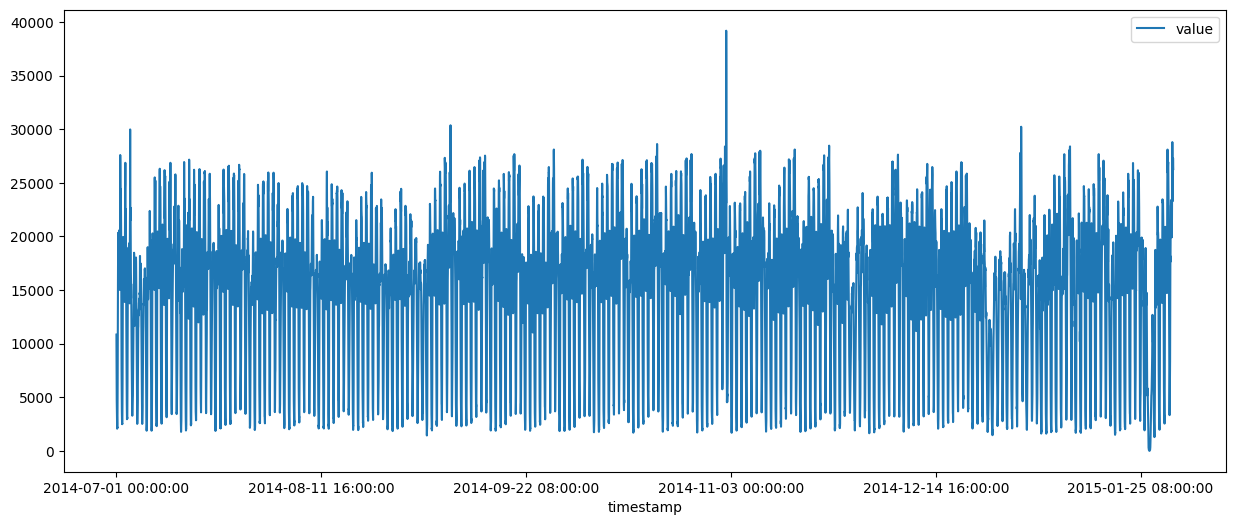

In [7]:
nyc_taxi_df.plot(x='timestamp', y='value', figsize=(15, 6))
plt.show()

In [14]:
from sklearn.preprocessing import MinMaxScaler

nyc_taxi_df['datetime'] = pd.to_datetime(nyc_taxi_df['timestamp'])
nyc_taxi_df['scaled_value'] = MinMaxScaler().fit_transform(nyc_taxi_df[['value']])

In [15]:
nyc_taxi_df['scaled_value'].describe()

count    10320.000000
mean         0.386067
std          0.177078
min          0.000000
25%          0.261655
50%          0.427926
75%          0.506028
max          1.000000
Name: scaled_value, dtype: float64

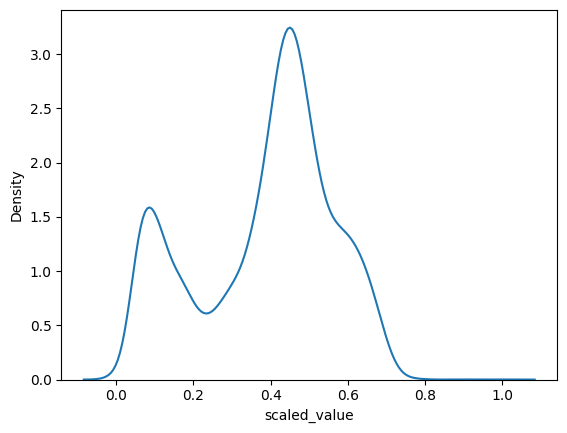

In [16]:
sns.kdeplot(nyc_taxi_df['scaled_value'])
plt.show()

In [23]:
sequence_length = 16 # 15입력 1출력

sequences = nyc_taxi_df['scaled_value'].values

X = []
y = []
for idx in range(len(sequences) - sequence_length + 1):
    window = sequences[idx:idx+sequence_length]
    X.append(window[:-1])
    y.append(window[-1:])

X = np.array(X)
y = np.array(y)

print(X.shape, y.shape)

(10305, 15) (10305, 1)


In [25]:
X = X.reshape(X.shape[0], X.shape[1], 1)

In [26]:
X.shape, y.shape

((10305, 15, 1), (10305, 1))

In [20]:
import tensorflow as tf
from tensorflow import keras as tf_keras

model = tf_keras.models.Sequential()
model.add(tf_keras.layers.Input(shape=(None, 1)))
model.add(tf_keras.layers.LSTM(units=16, return_sequences=True))
model.add(tf_keras.layers.LSTM(units=1, activation='sigmoid'))

model.compile(optimizer="adam",
              loss="mae",
              metrics=["mae"])

In [27]:
history = model.fit(X, y, batch_size=32, epochs=10, validation_split=0.2)

Epoch 1/10
258/258 [==============================] - 17s 48ms/step - loss: 0.1181 - mae: 0.1181 - val_loss: 0.0911 - val_mae: 0.0911
Epoch 2/10
258/258 [==============================] - 12s 47ms/step - loss: 0.0612 - mae: 0.0612 - val_loss: 0.0599 - val_mae: 0.0599
Epoch 3/10
258/258 [==============================] - 12s 47ms/step - loss: 0.0470 - mae: 0.0470 - val_loss: 0.0500 - val_mae: 0.0500
Epoch 4/10
258/258 [==============================] - 12s 47ms/step - loss: 0.0395 - mae: 0.0395 - val_loss: 0.0421 - val_mae: 0.0421
Epoch 5/10
258/258 [==============================] - 12s 47ms/step - loss: 0.0339 - mae: 0.0339 - val_loss: 0.0365 - val_mae: 0.0365
Epoch 6/10
258/258 [==============================] - 12s 48ms/step - loss: 0.0306 - mae: 0.0306 - val_loss: 0.0313 - val_mae: 0.0313
Epoch 7/10
258/258 [==============================] - 12s 47ms/step - loss: 0.0278 - mae: 0.0278 - val_loss: 0.0313 - val_mae: 0.0313
Epoch 8/10
258/258 [==============================] - 12s 47ms

In [28]:
predicted_values = model.predict(X)

323/323 [==============================] - 3s 7ms/step


In [30]:
error = (y - predicted_values)

In [36]:
# print( error, np.abs(error) )

abs_error = np.abs(error)
abs_error.sort(axis=0) # 오름차순 정렬

In [38]:
abs_error[:10]

array([[3.99868853e-06],
       [4.69288666e-06],
       [9.30407987e-06],
       [1.03162843e-05],
       [1.26801783e-05],
       [1.37706466e-05],
       [1.62100542e-05],
       [2.33737358e-05],
       [2.52716408e-05],
       [3.06716979e-05]])

In [42]:
cutoff = int(len(abs_error) * 0.95)
threshold = abs_error[cutoff]
cutoff, threshold

(9789, array([0.06784873]))

In [ ]:
# 실시간 데이터 발생치를 사용해서 다음 예측값을 뽑고 
# 실제 발생 값과 예측값의 차이가 threshold를 벗어나면 이상치 판정